# Chapter 3. Classification

In Chapter 1 it was mentioned that the most common supervised learning tasks are regression (predicting values) and classification (predicting classes).

In Chapter 2 it was explored a regression task, predicting housing values, using various algorithms such as Linear Regression, Decision Trees, and Random Forests (which will be explained in further detail in later chapters). Now classification systems will be covered.

In [1]:
# Setup

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## MNIST

The text describes the MNIST dataset, which consists of 70,000 small images of handwritten digits. The dataset is labeled with the corresponding digits. It is widely used in the field of Machine Learning and is often considered the "hello world" of ML. Many researchers and learners use this dataset to test the performance of new classification algorithms and it is a common dataset for anyone studying Machine Learning.

Scikit-Learn provides many helper functions to download popular
datasets. MNIST is one of them. The following code fetches the MNIST
dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/Users/daniloneves/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Scikit-Learn datasets follow a consistent dictionary structure. The structure includes a "DESCR" key providing a description of the dataset, a "data" key containing an array with instances and features, and a "target" key containing an array with corresponding labels.

In [3]:
# Looking at the data

X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

The dataset consists of 70,000 images, where each image has 784 features. The images are 28x28 pixels, and each feature represents the intensity of a pixel ranging from 0 (white) to 255 (black). To visualize a digit from the dataset, you can retrieve the feature vector of an instance, reshape it into a 28x28 array, and display it using Matplotlib's imshow() function.

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

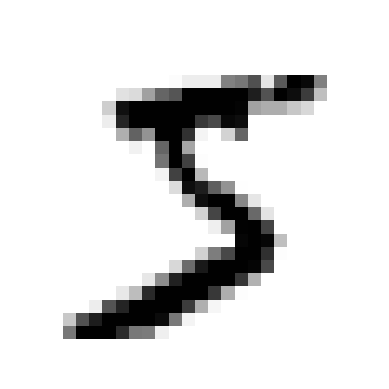

In [7]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [9]:
# Label
y[0]

'5'

In [10]:
# Changing label from string to integer

y = y.astype(np.uint8)

In [12]:
# Creating a test set

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier